In [ ]:
!nvidia-smi

In [1]:
from transformers import RobertaTokenizer, RobertaTokenizerFast
from transformers import RobertaForSequenceClassification
from transformers import RobertaConfig, RobertaModel, RobertaForMaskedLM
from transformers import LineByLineTextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
import torch
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
maskedlm_model = RobertaForMaskedLM.from_pretrained("roberta-large")

Downloading: 100%|██████████| 1.33G/1.33G [02:07<00:00, 11.2MB/s]


In [2]:
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-large", do_lower_case=True)

In [3]:
print(tokenizer.tokenize('COVID'))
print(tokenizer.tokenize('coronavirus'))

['CO', 'VID']
['cor', 'on', 'av', 'irus']


In [4]:
print (len(tokenizer)) 
tokenizer.add_tokens(["COVID"]) 
tokenizer.add_tokens(["Covid"]) 
tokenizer.add_tokens(["covid"]) 
tokenizer.add_tokens(["coronavirus"])
print (len(tokenizer)) 

50265
50269


In [5]:
print(tokenizer.tokenize('COVID'))
print(tokenizer.tokenize('Covid'))
print(tokenizer.tokenize('covid'))
print(tokenizer.tokenize('coronavirus'))

['COVID']
['Covid']
['covid']
['coronavirus']


In [6]:
test_sentence = "COVID Covid covid and coronavirus are bad"
print(tokenizer.tokenize(test_sentence))

['COVID', 'Ġ', 'Covid', 'Ġ', 'covid', 'Ġand', 'Ġ', 'coronavirus', 'Ġare', 'Ġbad']


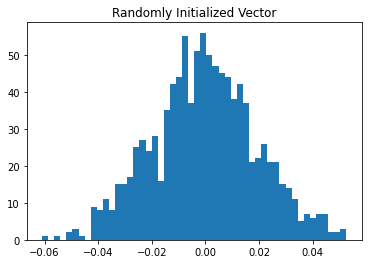

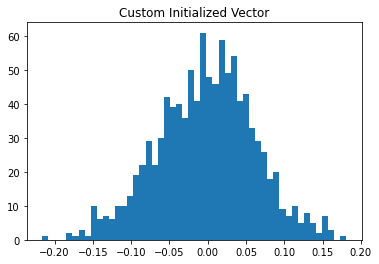

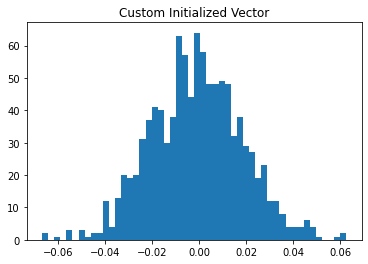

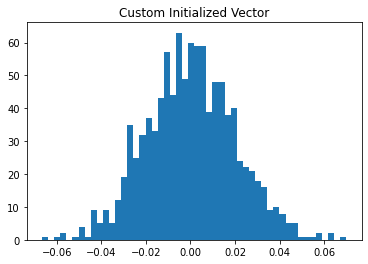

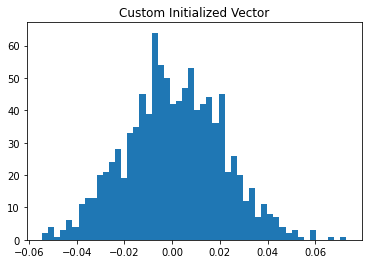

In [10]:
# FOR CORONAVIRUS:
maskedlm_model.resize_token_embeddings(len(tokenizer)) 
random_vector = maskedlm_model.get_input_embeddings().weight[-1].detach().numpy() # last one is covid random vector

plt.title("Randomly Initialized Vector")
plt.hist(random_vector, bins=50)
plt.show()

pandemic_id = tokenizer.convert_tokens_to_ids("pandemic")
virus_id = tokenizer.convert_tokens_to_ids("virus")
respiratory_id = tokenizer.convert_tokens_to_ids("respiratory")
virus_embedding = maskedlm_model.get_input_embeddings().weight[virus_id]
pandemic_embedding = maskedlm_model.get_input_embeddings().weight[pandemic_id]
respiratory_embedding = maskedlm_model.get_input_embeddings().weight[respiratory_id]
mean_embedding = torch.mean(torch.stack([virus_embedding, respiratory_embedding, pandemic_embedding]), dim=0)
maskedlm_model.get_input_embeddings().weight[-1].data[:] = mean_embedding
mean_vector = maskedlm_model.get_input_embeddings().weight[-1].detach().numpy()

plt.title("Custom Initialized Vector")
plt.hist(mean_vector, bins=50)
plt.show()

# For COVID:
maskedlm_model.resize_token_embeddings(len(tokenizer)) 
random_vector = maskedlm_model.get_input_embeddings().weight[-2].detach().numpy() # last one is covid random vector

pandemic_id = tokenizer.convert_tokens_to_ids("pandemic")
virus_id = tokenizer.convert_tokens_to_ids("virus")
respiratory_id = tokenizer.convert_tokens_to_ids("respiratory")
virus_embedding = maskedlm_model.get_input_embeddings().weight[virus_id]
pandemic_embedding = maskedlm_model.get_input_embeddings().weight[pandemic_id]
respiratory_embedding = maskedlm_model.get_input_embeddings().weight[respiratory_id]
mean_embedding = torch.mean(torch.stack([virus_embedding, respiratory_embedding, pandemic_embedding]), dim=0)
maskedlm_model.get_input_embeddings().weight[-1].data[:] = mean_embedding
mean_vector = maskedlm_model.get_input_embeddings().weight[-2].detach().numpy()

plt.title("Custom Initialized Vector")
plt.hist(mean_vector, bins=50)
plt.show()

# For Covid:
maskedlm_model.resize_token_embeddings(len(tokenizer)) 
random_vector = maskedlm_model.get_input_embeddings().weight[-3].detach().numpy() # last one is covid random vector

pandemic_id = tokenizer.convert_tokens_to_ids("pandemic")
virus_id = tokenizer.convert_tokens_to_ids("virus")
respiratory_id = tokenizer.convert_tokens_to_ids("respiratory")
virus_embedding = maskedlm_model.get_input_embeddings().weight[virus_id]
pandemic_embedding = maskedlm_model.get_input_embeddings().weight[pandemic_id]
respiratory_embedding = maskedlm_model.get_input_embeddings().weight[respiratory_id]
mean_embedding = torch.mean(torch.stack([virus_embedding, respiratory_embedding, pandemic_embedding]), dim=0)
maskedlm_model.get_input_embeddings().weight[-1].data[:] = mean_embedding
mean_vector = maskedlm_model.get_input_embeddings().weight[-3].detach().numpy()

plt.title("Custom Initialized Vector")
plt.hist(mean_vector, bins=50)
plt.show()


# For covid:
maskedlm_model.resize_token_embeddings(len(tokenizer)) 
random_vector = maskedlm_model.get_input_embeddings().weight[-4].detach().numpy() # last one is covid random vector

pandemic_id = tokenizer.convert_tokens_to_ids("pandemic")
virus_id = tokenizer.convert_tokens_to_ids("virus")
respiratory_id = tokenizer.convert_tokens_to_ids("respiratory")
virus_embedding = maskedlm_model.get_input_embeddings().weight[virus_id]
pandemic_embedding = maskedlm_model.get_input_embeddings().weight[pandemic_id]
respiratory_embedding = maskedlm_model.get_input_embeddings().weight[respiratory_id]
mean_embedding = torch.mean(torch.stack([virus_embedding, respiratory_embedding, pandemic_embedding]), dim=0)
maskedlm_model.get_input_embeddings().weight[-1].data[:] = mean_embedding
mean_vector = maskedlm_model.get_input_embeddings().weight[-4].detach().numpy()

plt.title("Custom Initialized Vector")
plt.hist(mean_vector, bins=50)
plt.show()


In [ ]:
dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="pretraining_tweets_en_full.txt",
    block_size=32,
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

training_args = TrainingArguments(   
    output_dir="./",
    overwrite_output_dir=True,
    learning_rate=3e-05, 
    num_train_epochs=4,
    per_gpu_train_batch_size=32,
    save_steps=1000,
    #save_total_limit=2,
)

# Set up trainer
trainer = Trainer(
    model=maskedlm_model,
    args=training_args,
    data_collator=data_collator,
    train_dataset= dataset
)

In [27]:
trainer.train()

Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
/home/ubuntu/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6079
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 380
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size`

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=380, training_loss=2.1861948113692433, metrics={'train_runtime': 90.2286, 'train_samples_per_second': 67.373, 'train_steps_per_second': 4.212, 'total_flos': 354134342388288.0, 'train_loss': 2.1861948113692433, 'epoch': 1.0})

In [30]:
trainer.save_model("covid_trained_roberta")

Saving model checkpoint to covid_trained_en
Configuration saved in covid_trained_en/config.json
Model weights saved in covid_trained_en/pytorch_model.bin


In [31]:
tokenizer.save_pretrained("covid_trained_roberta_tok")

tokenizer config file saved in covid_trained_en_tok/tokenizer_config.json
Special tokens file saved in covid_trained_en_tok/special_tokens_map.json
added tokens file saved in covid_trained_en_tok/added_tokens.json


('covid_trained_en_tok/tokenizer_config.json',
 'covid_trained_en_tok/special_tokens_map.json',
 'covid_trained_en_tok/vocab.json',
 'covid_trained_en_tok/merges.txt',
 'covid_trained_en_tok/added_tokens.json')